In [10]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset
#Around100M+ ratings 4499 movies 480,000 users
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
file_path = "/content/combined_data_1.txt"
df = pd.read_csv(file_path)

In [12]:
# Reading dataset file
netflix_dataset = pd.read_csv('/content/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset.head()

<ipython-input-12-e243e9022ff8>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  netflix_dataset = pd.read_csv('/content/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [13]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
9835286,274790,5.0
9835287,1227109,5.0
9835288,1298387,4.0
9835289,2329541,5.0


In [14]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [15]:

# netflix_dataset['Rating']=netflix_dataset['Rating'].astype(float)

In [16]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [17]:

netflix_dataset.shape

(9835291, 2)

In [18]:
#get the customer count with NaN values
movie_count=netflix_dataset.isnull().sum()
movie_count

,0
Cust_Id,0
Rating,1906


In [19]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [20]:
customer_count

584062

In [21]:
#without NaN values
customer_count=netflix_dataset['Cust_Id'].nunique()-movie_count
customer_count

,0
Cust_Id,584062
Rating,582156


In [22]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

,0
Cust_Id,9835291
Rating,9833385


In [23]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [24]:
stars

,count
Rating,
1.0,435146
2.0,958190
3.0,2796913
4.0,3392627
5.0,2250509


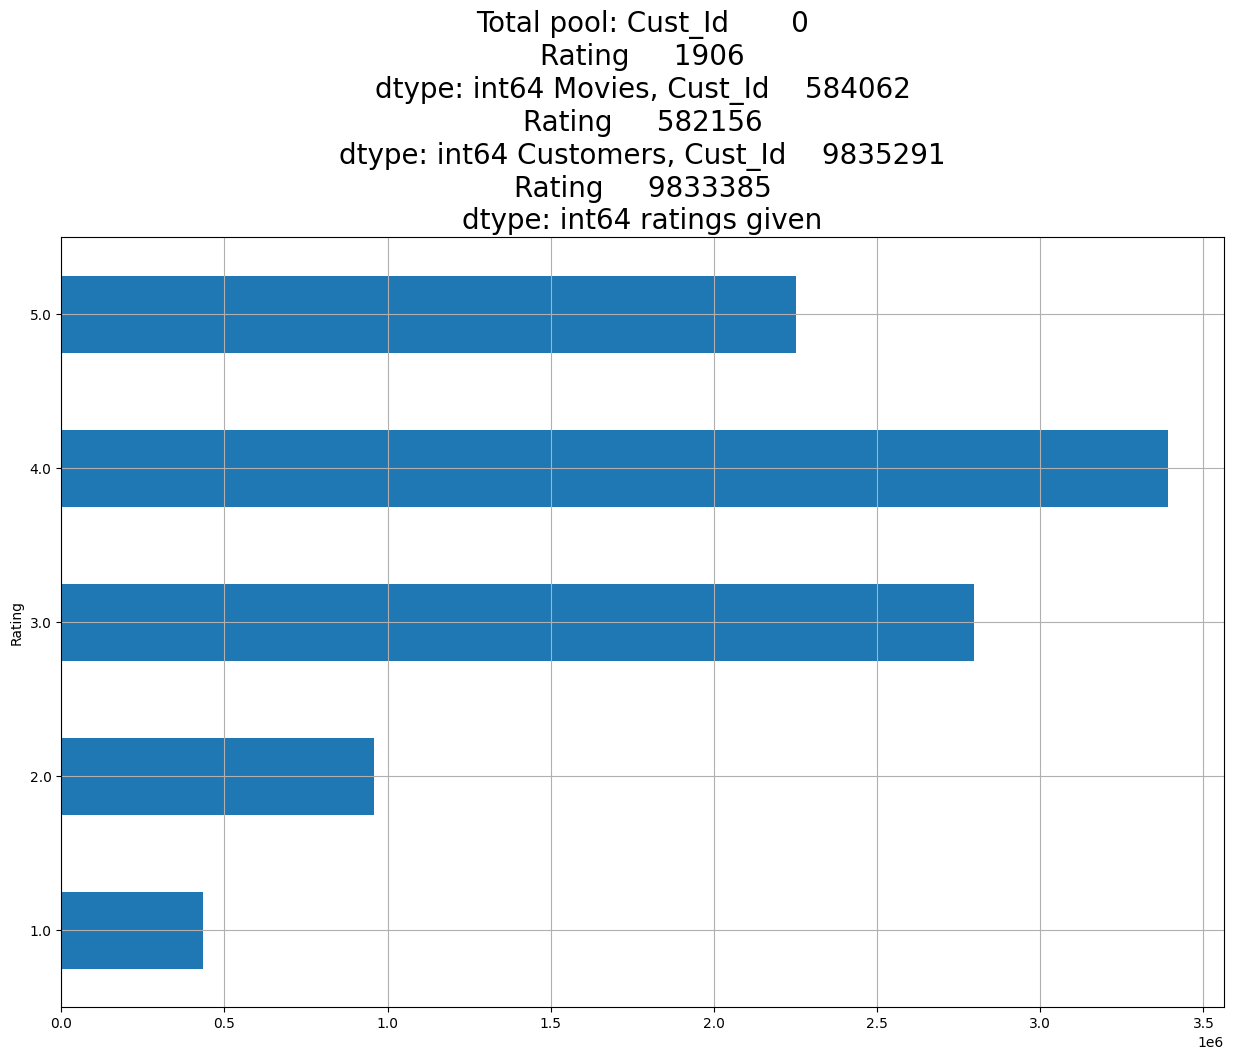

In [25]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [26]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [27]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
9835286,False
9835287,False
9835288,False
9835289,False


In [28]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
9668111,True
9688599,True
9688862,True
9689083,True


In [29]:
df_nan.shape

(1906, 1)

In [30]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [31]:
df_nan.tail()

,Rating
9668111,True
9688599,True
9688862,True
9689083,True
9835290,True


In [32]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [33]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
1901,9668111,True
1902,9688599,True
1903,9688862,True
1904,9689083,True


In [34]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1
    #movie_id=movie_id+1


In [35]:
df_nan.iloc[-1, 0]

9835290

In [36]:
len(netflix_dataset)

9835291

In [37]:
# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(netflix_dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 1.905e+03 1.905e+03 1.905e+03]
Length: 9833385


In [38]:
len(netflix_dataset)

9835291

In [39]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
9835286,274790,5.0
9835287,1227109,5.0
9835288,1298387,4.0
9835289,2329541,5.0


In [40]:
df_nan['index'][1:]

,index
1,548
2,694
3,2707
4,2850
5,3991
...,...
1901,9668111
1902,9688599
1903,9688862
1904,9689083


In [41]:
df_nan['index'][:-1]

,index
0,0
1,548
2,694
3,2707
4,2850
...,...
1900,9645262
1901,9668111
1902,9688599
1903,9688862


In [42]:
len(netflix_dataset)

9835291

In [43]:
#working
x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [44]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [45]:
temp=np.full((1,200), 1) #(shape, fill_value)

In [46]:
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [47]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.head()

<ipython-input-47-cdbbe0cd23c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']=movie_np.astype(int)


Now the dataset will look like: 


<ipython-input-47-cdbbe0cd23c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [48]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
9835285,1331406,3.0,1905
9835286,274790,5.0,1905
9835287,1227109,5.0,1905
9835288,1298387,4.0,1905
9835289,2329541,5.0,1905


In [49]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
f=['count','mean']

In [50]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)

#benchmark

In [51]:
dataset_movie_summary

Cust_Id                Rating          
           count          mean   count      mean
Movie_Id                                        
1            547  1.249876e+06     547  3.749543
2            145  1.341926e+06     145  3.558621
3           2012  1.324290e+06    2012  3.641153
4            142  1.402854e+06     142  2.739437
5           1140  1.302384e+06    1140  3.919298
...          ...           ...     ...       ...
1901       22848  1.321594e+06   22848  3.640581
1902       20487  1.325338e+06   20487  3.429053
1903         262  1.299815e+06     262  2.259542
1904         220  1.369052e+06     220  3.663636
1905      146206  1.322740e+06  146206  4.155979

[1905 rows x 4 columns]

In [52]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)

In [53]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
1901,22848,3.640581
1902,20487,3.429053
1903,262,2.259542


In [54]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
# dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [55]:
dataset_movie_summary["count"].quantile(0.7)

1930.8

In [56]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1931.0

In [57]:
dataset_movie_summary['count']

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
1901,22848
1902,20487
1903,262


In [58]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1903, 1904],
      dtype='int64', name='Movie_Id', length=1333)

In [59]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,61,3.245902
7,74,4.121622
8,8,3.875000
10,20,3.250000
25,2,3.500000
...,...,...
2649404,6,3.833333
2649409,6,3.833333
2649421,1,5.000000


In [60]:
# dataset_cust_summary.index=dataset_cust_summary.index.map(int)

In [61]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

23.0

In [62]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     126,
       ...
       2649326, 2649337, 2649351, 2649375, 2649376, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=311640)

In [63]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (9833385, 3) shape


In [64]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (6966531, 3)


In [65]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [66]:
#now we will prepare the dataset for SVD and it takes the matrix as the input
# so for input, we will convert the dataset into sparse matrix
#4499 movies
# df_p = pd.pivot_table(netflix_dataset, values='Rating', index='Cust_Id', columns='Movie_Id')
# print(df_p.shape)

In [67]:
import pandas as pd

In [68]:
df_title = pd.read_csv("movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

In [69]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [70]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505166 sha256=262c2830909b549ee1fcbaabdc3cfa933bb14ff94176fb725870b5c369afc3f5
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [71]:
#model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [72]:
#!pip install scikit-surprise

In [73]:
#help us to read the dataset for svd algo
reader=Reader()

In [74]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [75]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'],verbose=True)
#for 1st fold- 1,2,3,4,5

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9983  0.9933  1.0112  0.9909  0.9934  0.9974  0.0073  
MAE (testset)     0.7922  0.7890  0.8044  0.7902  0.7948  0.7941  0.0055  
Fit time          4.39    6.38    3.83    1.79    1.75    3.63    1.74    
Test time         0.20    1.02    0.29    0.24    0.11    0.37    0.33    


{'test_rmse': array([0.99825456, 0.99329871, 1.01116699, 0.9908567 , 0.99344704]),
 'test_mae': array([0.79218092, 0.78895491, 0.80441729, 0.79020547, 0.79479234]),
 'fit_time': (4.388203144073486,
  6.382836818695068,
  3.8298287391662598,
  1.7866487503051758,
  1.7503070831298828),
 'test_time': (0.20227479934692383,
  1.022862434387207,
  0.28614306449890137,
  0.236846923828125,
  0.11179018020629883)}

In [76]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [77]:
#so first we take user 712664 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *
dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating']==5)]
# dataset_712664=dataset_712664.set_index('Movie_Id')
# dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
1109018,712664,5.0,256
1867113,712664,5.0,348
1904469,712664,5.0,357
2209354,712664,5.0,416
2289721,712664,5.0,442


In [78]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [79]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [80]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [81]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [82]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-82-42d8450a9196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)


In [83]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664)

        Year                        Name  Estimate_Score
25    2004.0             Never Die Alone        2.914109
7     2004.0  What the #$*! Do We Know!?        2.962342
16    2005.0                   7 Seconds        3.106001
15    1996.0                   Screamers        3.585673
9551  1997.0                    I.M. Pei        3.763770
...      ...                         ...             ...
6818  2004.0  NASCAR: Adrenaline: Vol. 1        3.763770
29    2003.0      Something's Gotta Give        3.842369
2     1997.0                   Character        3.889505
17    1994.0            Immortal Beloved        3.964495
27    2002.0             Lilo and Stitch        4.050909

[16437 rows x 3 columns]


In [84]:
# user_712664.head(10)

In [85]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

      Year                     Name  Estimate_Score
27  2002.0          Lilo and Stitch        4.050909
17  1994.0         Immortal Beloved        3.964495
2   1997.0                Character        3.889505
29  2003.0   Something's Gotta Give        3.842369
51  2002.0  The Weather Underground        3.763770
76  1995.0                    Congo        3.763770
75  1952.0    I Love Lucy: Season 2        3.763770
67  2004.0              Invader Zim        3.763770
57  1996.0              Dragonheart        3.763770
56  1995.0              Richard III        3.763770
